# Entregable Grupal Etapa 3: Generación de Modelos de Aprendizaje y Evaluación de los mismos
-------
**Ana Daniela López Dávila | A00831568**

**César Guillermo Vázquez Álvarez | A01197857**

**Camila Navarro Llaven | A00517244**

**Paola Guadalupe Machorro Ortiz | A00831197**

**Alejandro José Murcia Alfaro | A00828513**

## Índice
- [**Preparación de Datos**](#1) 

    - [**Variables relevantes**](#I1)
    
    - [**Visualización de las variables relevantes**](#I2)


- [**Generación de modelos de aprendizaje y su evaluación**](#2)

    - [**Comparación de resultados**](#2.1)
    
    - [**Análisis de resultados y selección de modelo de predicción**](#2.2)
    

- [**Implementación de los modelos**](#3)

    - [**Prueba de modelos**](#3.1)
        
        - [**Support Vector Machine**](#M1)
    
        - [**Logistic Regression**](#M2)
    
        - [**Random Forest**](#M3)
        
    - [**Evaluación de modelos**](#3.2)
    
        - [**Accuracy**](#E1)
    
        - [**Matriz de confusión**](#E2)

        - [**Precisión**](#E3)

        - [**Sensitividad**](#E4)

        - [**Especificidad**](#E5)

        - [**ROC-AUC**](#E6)

    - [**Ajuste de hiperparámetros de modelos**](#3.3)
    
        - [**Evaluación y comparación**](#P1)

    - [**Validación cruzada de modelos**](#3.4)
    
    
- [**Conclusión**](#4)

## Preparación de Datos <a name='1'></a>
Descripción y visualización de las variables relevantes

**Variables relevantes** <a name='I1'></a> 

| Variable | Tipo de variable | Descripción | Posibles valores | Tipo de dato |
| -------- | ---------------- | ----------- | ---------------- | ------------ |
| Perfil Pymetrics | Variable categórica | Nos muestra que tipo perfil según Pymetrics es el candidato | Rango: 1-10 | int64 |
|Altamente Recomendado | Variable categórica | Nos menciona si el candidato es altamente recomendado o no | Rango:0-1 | int64 |
| Operaciones-Calidad | Variable categórica | Nos muestra si el candidato es apto, no apto o indefinido en la categoría Operaciones-Calidad | Rango: 0-2 | int64 |
| MTTO-DIMA | Variable categórica | Nos muestra si el candidato es apto, no apto o indefinido en la categoría MTTO-DIMA | Rango: 0-2 | int64 |
| Comercial-Planteamiento | Variable categórica | Nos muestra si el candidato es apto, no apto o indefinido en la categoría Comercial-Planteamiento | Rango: 0-2 | int64 |
| DIGI-SC | Variable categórica | Nos muestra si el candidato es apto, no apto o indefinido en la categoría DIGI-SC | Rango: 0-2 | int64 |
| Resto-Soft | Variable categórica | Nos muestra si el candidato es apto, no apto o indefinido en la categoría Resto-Soft | Rango: 0-2 | int64 |
|Actividad Grupal.1 | Variable categórica | Nos menciona que actividad grupal realizo el candidato | Rango: 0-5 | int64 |
| Apto AG | Variable categórica | Nos menciona si el candidato es apto o no apto | Rango: 0-1 | int64 |
| Ingles | Variable categórica | Nos muestra el nivel de ingles empezando en A1 a C2 | Rango: 0-6 | float64 |
| Apto | Variable categórica | Nos menciona si el candidato es apto o no apto | Rango: 0-1 | int64 |
| Destacado | Variable categórica | Nos menciona si el candidato es destacado o no destacado | Rango: 0-1 | int64 |
| Destacado Pym | Variable categórica | Nos menciona si el candidato es apto o no apto segun pymetrics | Rango: 0-1 | int64 |
| Ingresados Si/No | Parámetro objetivo | Nos muestra si el candidato sí ingreso o no | Rango: 0-1 | int64 |


A continuación, se muestra una descripción general de la base de datos

In [1]:
# Importar librerias
import pandas as pd 
import warnings
warnings.filterwarnings('ignore') # Mostrar de forma limpia los outputs

# Importar base de datos
data = pd.read_csv("retoternium.csv", encoding = "utf-8" ) # UTF-8: da el formato que funcionará con los acentos
del(data['Unnamed: 0'])

In [2]:
data.head()

,Perfil Pymetrics,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Apto AG,Ingles,Apto,Destacado,Destacado Pym,Ingresados Si/No
0,4,1,2,1,2,0,0,5,0,4.0,1,1,1,1
1,4,1,2,0,0,0,0,5,0,4.0,1,1,1,0
2,1,1,2,2,0,1,2,5,0,4.0,1,1,1,1
3,4,0,0,0,0,0,0,0,0,0.0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0.0,0,0,0,0


Hasta ahorita, tenemos una idea visual de nuestra base de datos donde podemos ver el nombre de las columnas y los primeros cinco registros.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Perfil Pymetrics        1050 non-null   int64  
 1   Altamente Recomendado   1050 non-null   int64  
 2   Operaciones-Calidad     1050 non-null   int64  
 3   MTTO-DIMA               1050 non-null   int64  
 4   Comercial-Planeamiento  1050 non-null   int64  
 5   DIGI-SC                 1050 non-null   int64  
 6   Resto-Soft              1050 non-null   int64  
 7   Actividad Grupal.1      1050 non-null   int64  
 8   Apto AG                 1050 non-null   int64  
 9   Ingles                  1050 non-null   float64
 10  Apto                    1050 non-null   int64  
 11  Destacado               1050 non-null   int64  
 12  Destacado Pym           1050 non-null   int64  
 13  Ingresados Si/No        1050 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 1

Usando el método ```.info()```, conocemos los datos generales de la base de datos. Es decir, la memoria que utiliza, el tipo de datos en cada columna, la cantidad de datos no nulos por columna, el nombre e índice de cada columna, la cantidad de columnas y registros.

In [4]:
data.describe()

,Perfil Pymetrics,Altamente Recomendado,Operaciones-Calidad,MTTO-DIMA,Comercial-Planeamiento,DIGI-SC,Resto-Soft,Actividad Grupal.1,Apto AG,Ingles,Apto,Destacado,Destacado Pym,Ingresados Si/No
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,6.020000,0.227619,0.415238,0.628571,0.300000,0.378095,0.456190,0.521905,0.086667,0.343810,0.122857,0.067619,0.213333,0.069524
std,2.902381,0.419495,0.740337,0.823362,0.661122,0.679887,0.737453,1.254162,0.281480,1.119583,0.328430,0.251211,0.409856,0.254464
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000


Por último, el método ```.describe()``` proporciona la descripción estadística de la base de datos. Es decir, el promedio, cantidad, desviación estandar, valor mínimo, cuartiles, valor máximo y la cantidad de los registros en cada columna.

**Visualización de las variables relevantes** <a name='I2'></a>

Interpretación de gráficas sobre las variables categóricas relevantes 

PENDIENTEEEEEEEEEEE !!!!!!!!!!!

In [5]:
data.columns

Index(['Perfil Pymetrics', 'Altamente Recomendado', 'Operaciones-Calidad',
       'MTTO-DIMA', 'Comercial-Planeamiento', 'DIGI-SC', 'Resto-Soft',
       'Actividad Grupal.1', 'Apto AG', 'Ingles', 'Apto', 'Destacado',
       'Destacado Pym', 'Ingresados Si/No'],
      dtype='object')

<AxesSubplot:xlabel='Perfil Pymetrics'>

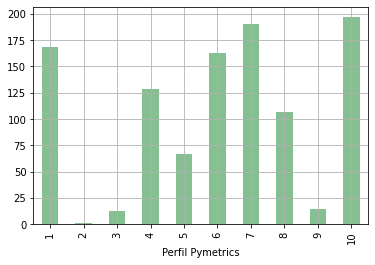

In [6]:
data.groupby('Perfil Pymetrics').size().plot(kind="bar",grid=True, color='#86bf91')

<AxesSubplot:title={'center':'Altamente Recomendado'}, ylabel='None'>

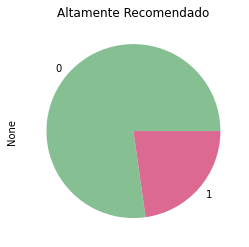

In [7]:
data.groupby('Altamente Recomendado').size().plot(kind="pie",grid=True,title='Altamente Recomendado', colors=['#86bf91',"#db6991"])

<AxesSubplot:title={'center':'Operaciones-Calidad'}, ylabel='None'>

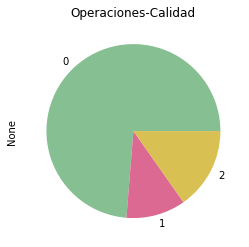

In [8]:
data.groupby('Operaciones-Calidad').size().plot(kind="pie",grid=True, colors=['#86bf91',"#db6991",'#d9c052'], title='Operaciones-Calidad')

<AxesSubplot:title={'center':'MTTO-DIMA'}, ylabel='None'>

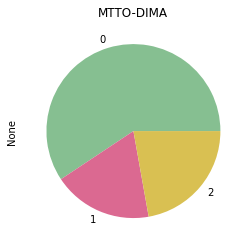

In [9]:
data.groupby('MTTO-DIMA').size().plot(kind="pie",grid=True, colors=['#86bf91',"#db6991",'#d9c052'], title='MTTO-DIMA')

<AxesSubplot:title={'center':'Comercial-Planeamiento'}, ylabel='None'>

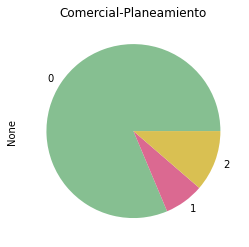

In [10]:
data.groupby('Comercial-Planeamiento').size().plot(kind="pie",grid=True, colors=['#86bf91',"#db6991",'#d9c052'], title='Comercial-Planeamiento')

<AxesSubplot:title={'center':'DIGI-SC'}, ylabel='None'>

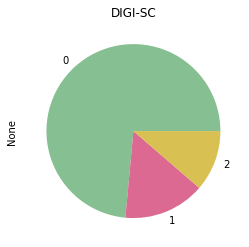

In [11]:
data.groupby('DIGI-SC').size().plot(kind="pie",grid=True, colors=['#86bf91',"#db6991",'#d9c052'], title='DIGI-SC')

<AxesSubplot:title={'center':'Resto-Soft'}, ylabel='None'>

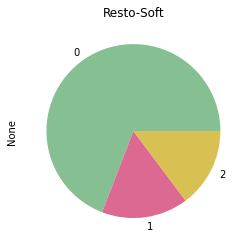

In [12]:
data.groupby('Resto-Soft').size().plot(kind="pie",grid=True, colors=['#86bf91',"#db6991",'#d9c052'], title='Resto-Soft')

<AxesSubplot:xlabel='Actividad Grupal.1'>

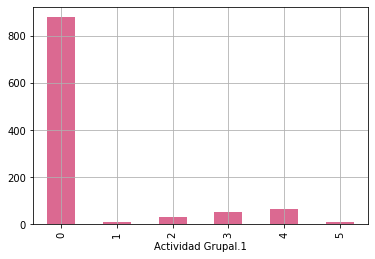

In [13]:
data.groupby('Actividad Grupal.1').size().plot(kind="bar",grid=True, color="#db6991")

<AxesSubplot:xlabel='Ingles'>

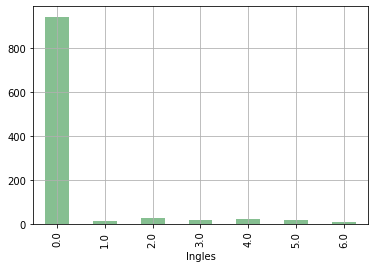

In [14]:
data.groupby('Ingles').size().plot(kind="bar",grid=True, color='#86bf91')

<AxesSubplot:title={'center':'Apto AG'}, ylabel='None'>

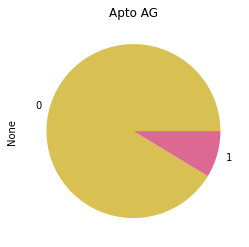

In [15]:
data.groupby('Apto AG').size().plot(kind="pie",grid=True, colors=['#d9c052',"#db6991"], title='Apto AG')

<AxesSubplot:title={'center':'Apto'}, ylabel='None'>

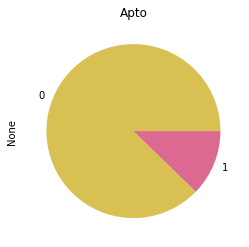

In [16]:
data.groupby('Apto').size().plot(kind="pie",grid=True, colors=['#d9c052',"#db6991"], title='Apto')

<AxesSubplot:title={'center':'Destacado'}, ylabel='None'>

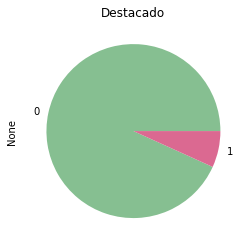

In [17]:
data.groupby('Destacado').size().plot(kind="pie",grid=True, colors=['#86bf91',"#db6991"], title='Destacado')

<AxesSubplot:title={'center':'Destacado Pym'}, ylabel='None'>

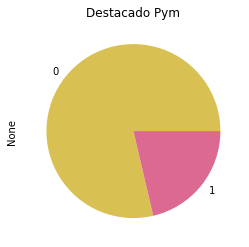

In [18]:
data.groupby('Destacado Pym').size().plot(kind="pie",grid=True, colors=['#d9c052',"#db6991"], title='Destacado Pym')

## Generación de modelos de aprendizaje y su evaluación <a name='2'></a>

### Comparación de resultados <a name='2.1'></a>

La tabla de comparación entre cada integrante del equipo se encuentra en el documento rector: Entregable Etapa 3 - Equipo 3.

### Análisis de resultados y selección de modelo de predicción <a name='2.2'></a>

Podemos observar que en las seis pruebas efectuadas por cada miembro del equipo se obtuvieron excelentes resultados para todos los modelos probados. De hecho, el valor mínimo de exactitud obtenido en todas las pruebas de todos los modelos fue de 0.94, gozando todos ellos de valores sumamente exactos y cercanos a la totalidad de aciertos en cuanto a la predicción de la variable objetivo.

Sin embargo, la exactitud no es la única métrica a tomar en cuenta, ya que también debemos observar los resultados obtenidos en precisión y sensibilidad, los cuales, nos indican la proporción de verdaderos positivos  y falsos negativos, respectivamente. Con lo que tenemos dos puntos de comparación para poder decidir el mejor modelo. 

Por último, otro punto importante para comparar y decidir qué modelos utilizar fueron las curvas ROC-AUC, con su respectiva área bajo la curva. Esta es una medida de qué tanto fueron capaces los modelos de clasificar correctamente a la variable objetivo. Entre más cercano a 1 el valor, mejor el modelo.

Con todo esto en mente, determinamos que tres modelos cuentan con estas características: Support Vector Machine, Regresión Logística y Random Forest. Los resultados de estos modelos fueron muy altos en cuanto a exactitud, todos ellos arriba de 0.96. En cuanto a precisión y sensibilidad también se comportaron muy bien comparado con los demás modelos, obteniendo un valor promedio de 0.80 en cuanto a precisión y 0.85 en cuanto a sensibilidad. Así mismo, sus curvas ROC tuvieron un buen desempeño, todos con valores de AUC mayores de 0.90. Por lo que fueron estos los modelos escogidos para predecir la variable objetivo, ofreciendo cada uno de ellos una exactitud, precisión y sensibilidad muy buena. 


**Modelos seleccionados:**
- K-Nearest Neighbors

- Support Vector Machine

- Logistic Regression

## Implementación de los modelos <a name='3'></a>

In [19]:
# Definir variables predictoras
X = data.drop('Ingresados Si/No', axis = 1)

In [20]:
# Definir variable de respuesta
y = data['Ingresados Si/No'].astype('int') 

In [21]:
# Definición de conjuntos
# Importar librerias
from sklearn.model_selection import train_test_split

# Definir conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Prueba de modelos <a name='3.1'></a>
Se prueban los modelos de clasificación ya mencionados.

**Support Vector Machine**<a name='M1'></a>

Establece fronteras lineales con un hiperplano en el espacio total de valores posibles de forma que, dependiendo de dónde se encuentre un conjunto de datos concreto, estará a alguno de los lados de la frontera, lo que lleva a su clasificación según el lado en que se encuentre.

Características:

- Encuentra la mejor separación posible entre clases.

In [22]:
# Importar clasificador
from sklearn.svm import SVC

# Crear el modelo
SVM = SVC(probability=True) # probability=True se usa para poder calcular las métricas ROC y AUC

# Ajustar modelo
SVM.fit(X_train, y_train)

# Realizar una predicción
y_pred_SVM = SVM.predict(X_test) 

**Logistic Regression**<a name='M2'></a>

En lugar de mínimos cuadrados, utiliza el procedimiento de estimación máximo-verosímil.

Características:

- A la función logística también se le llama sigmoide.

In [23]:
# Importar clasificador
from sklearn.linear_model import LogisticRegression

# Crear el modelo
LR = LogisticRegression()

# Ajustar modelo
LR.fit(X_train, y_train)

# Realizar una predicción
y_pred_LR = LR.predict(X_test) 

**Random Forest**<a name='M3'></a>

Consiste en un ensamble de varios árboles de decision entrenados con el método bagging, cuya idea general es que la combinación de modelos de aprendizaje mejore el resultado final.

Características:

- Es un tipo de método BAGGing.

In [24]:
# Importar clasificador
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
RF = RandomForestClassifier() 

# Ajustar modelo
RF.fit(X_train, y_train)

# Realizar una predicción
y_pred_RF = RF.predict(X_test) 

### Evaluación de modelos <a name='3.2'></a>
Se calcula y utiliza métricas para comparar los modelos.

**Accuracy**<a name='E1'></a>

Es la métrica de clasificación más sencilla y provee una medida de la eficiencia general del modelo. Es importante recordar que no indica el tipo de error en la clasificación

**Matriz de confusión**<a name='E2'></a>

Da una imagen más completa de cómo funciona el clasificador y para dos clases, se produce una matriz 2x2

**Precisión**<a name='E3'></a>

Es el número de ejemplos positivos clasificados correctamente divididos entre el número total de ejemplos clasificados como positivos. Da a conocer qué tan *preciso* es el clasificador para predecir instancias positivas.

**Sensitividad**<a name='E4'></a>

También se le conoce como *Razón de Verdaderos Positivos*, da a conocer qué tan *sensible* es el clasificador para detectar las instancias positivas.

**Especificidad**<a name='E5'></a>

También se le conoce como *Razón de Verdaderos Negativos*, da a conocer qué tan *específico* es el clasificador en predecir instancias negativas.

In [25]:
# Importar librerias
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Creamos una variable que almacene los datos para poder compararlos
comparacion = [[],[],[]]
count = 0 # Contador

# Etiquetas de los modelos
modelos = [y_pred_SVM,y_pred_LR,y_pred_RF]
names = ['Support Vector Machine','Logistic Regression','Random Forest']

# En un bucle se calculan las métricas del modelo respectivo.
for y_pred in modelos:
    print('\n\n')
    print('----------------------------', names[count], '------------------------------\n')
    print('Matriz de confusión ->')
    cf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    print('\n')
    
    # save confusion matrix and slice into four pieces
    conf = metrics.confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = conf[1, 1]
    TN = conf[0, 0]
    FP = conf[0, 1]
    FN = conf[1, 0]
    print('Métricas calculadas a partir de una matriz de confusión ->')
    
    # Classification Accuracy
    print('Exactitud: ', (TP + TN) / float(TP + TN + FP + FN))
    print('Exactitud con metrics: ', metrics.accuracy_score(y_test, y_pred))
    comparacion[count].append((TP + TN) / float(TP + TN + FP + FN))
    comparacion[count].append(metrics.accuracy_score(y_test, y_pred))

    # Classification Error
    print('Error de clasificación: ', (FP + FN) / float(TP + TN + FP + FN))
    print('Error de clasificación con metrics:' , 1 - metrics.accuracy_score(y_test, y_pred))
    comparacion[count].append((FP + FN) / float(TP + TN + FP + FN))
    comparacion[count].append(1 - metrics.accuracy_score(y_test, y_pred))
    
    #Sensitivity
    print('Sensitividad: ', TP / float(FN + TP))
    print('Sensitividad con metrics: ', metrics.recall_score(y_test, y_pred))
    r = metrics.recall_score(y_test, y_pred)
    comparacion[count].append(TP / float(FN + TP))
    comparacion[count].append(metrics.recall_score(y_test, y_pred))
    
    # Specificity
    print('Especificidad: ', TN / (TN + FP))
    comparacion[count].append(TN / (TN + FP))
    
    # False Positive Rate
    print('Tasa de falsos positivos: ', FP / float(TN + FP))
    comparacion[count].append(FP / float(TN + FP))
    
    # Precision
    print('Precisión: ', metrics.precision_score(y_test, y_pred))
    p = metrics.precision_score(y_test, y_pred)
    comparacion[count].append(metrics.precision_score(y_test, y_pred))
    
    # F1-score
    print('F1-score: ', 2 / ((1/p) + (1/r)))
    comparacion[count].append(2 / ((1/p) + (1/r)))
    
    # AUC
    AUC = metrics.roc_auc_score(y_test, y_pred)
    comparacion[count].append(AUC)
    
    # Curva ROC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    comparacion[count].append(fpr)
    comparacion[count].append(tpr)
    comparacion[count].append(thresholds)
    
    count = count+1




---------------------------- Support Vector Machine ------------------------------

Matriz de confusión ->
[[237   5]
 [  2  19]]


Métricas calculadas a partir de una matriz de confusión ->
Exactitud:  0.973384030418251
Exactitud con metrics:  0.973384030418251
Error de clasificación:  0.026615969581749048
Error de clasificación con metrics: 0.026615969581749055
Sensitividad:  0.9047619047619048
Sensitividad con metrics:  0.9047619047619048
Especificidad:  0.9793388429752066
Tasa de falsos positivos:  0.02066115702479339
Precisión:  0.7916666666666666
F1-score:  0.8444444444444446



---------------------------- Logistic Regression ------------------------------

Matriz de confusión ->
[[237   5]
 [  3  18]]


Métricas calculadas a partir de una matriz de confusión ->
Exactitud:  0.9695817490494296
Exactitud con metrics:  0.9695817490494296
Error de clasificación:  0.030418250950570342
Error de clasificación con metrics: 0.03041825095057038
Sensitividad:  0.8571428571428571
Sensiti

**Comparación**

In [26]:
# Comparación
comp = {'Support Vector Machine': comparacion[0], 
       'Logistic Regression': comparacion[1], 
       'Random Forest': comparacion[2]}
tabla = pd.DataFrame(comp, index=['Exactitud','Exactitud con metrics','Error de clasificación',
                                     'Error de clasificación con metrics','Sensitividad',
                                     'Sensitividad con metrics','Especificidad','Tasa de falsos positivos',
                                     'Precisión', 'F1-score','AUC','fpr','tpr','thresholds'])
compar = tabla
compar = compar.drop(['fpr','tpr','thresholds'])
print('COMPARACIÓN')
compar

COMPARACIÓN


,Support Vector Machine,Logistic Regression,Random Forest
Exactitud,0.973384,0.969582,0.973384
Exactitud con metrics,0.973384,0.969582,0.973384
Error de clasificación,0.026616,0.030418,0.026616
Error de clasificación con metrics,0.026616,0.030418,0.026616
Sensitividad,0.904762,0.857143,0.904762
Sensitividad con metrics,0.904762,0.857143,0.904762
Especificidad,0.979339,0.979339,0.979339
Tasa de falsos positivos,0.020661,0.020661,0.020661
Precisión,0.791667,0.782609,0.791667
F1-score,0.844444,0.818182,0.844444


**ROC**<a name='E6'></a>

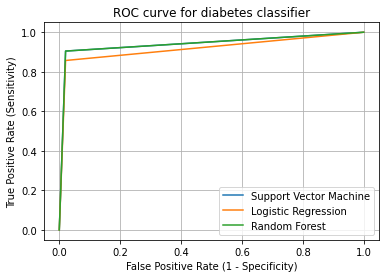

In [27]:
# Importar libreria
import matplotlib.pyplot as plt

# Generar gráfico
for i in range(0,3):
    plt.plot(comparacion[i][11], comparacion[i][12], label=names[i])

plt.title('ROC curve for diabetes classifier') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.legend()
plt.grid(True)
plt.show()

### Ajuste de hiperparámetros de modelos <a name='3.3'></a>
Se realiza ajuste de hiperparámetros de los modelos y se evaluan de nuevo, probando de nuevo los modelos considerando los ajustes realizados.

Utilizando ```GridSearchCV()``` para encontrar los mejores parámetros

In [28]:
# Importar librerias
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
import numpy as np

# Crear distribución de cada modelo
distribucion_SVM = dict(kernel=['linear', 'poly','rbf', 'sigmoid'],degree=[1,2,3,4,5,6],
                        max_iter=[-1,1000,2000])

distribucion_LR = dict(C=[0,1,2,3,4],penalty=['l2', 'l1', 'elasticnet', 'none'])

distribucion_RF = dict(n_estimators=[50,90,120,160],criterion=['gini','entropy'],)

# Etiquetas para el for
distribuciones = [distribucion_SVM,distribucion_LR,distribucion_RF]
M = [SVM,LR,RF] 

# Contador y variable que almacene los accuracy scores
count = 0
accu = []

# En un bucle ajustar hiperparámetros
for distribucion in distribuciones:
    print('\n\n')
    print('----------------------------', names[count], '------------------------------\n')
    M[count] = GridSearchCV(M[count], distribucion)
    # Ajustar el modelo otra vez
    M[count] = M[count].fit(X_train, y_train)
    print('Los mejores hiperparámetros ->')
    #modelos[count] = M[count].predict(X_test)
    P = M[count].best_params_
    accu.append(P)
    print(P)
    
    count = count+1




---------------------------- Support Vector Machine ------------------------------

Los mejores hiperparámetros ->
{'degree': 2, 'kernel': 'poly', 'max_iter': -1}



---------------------------- Logistic Regression ------------------------------

Los mejores hiperparámetros ->
{'C': 2, 'penalty': 'l2'}



---------------------------- Random Forest ------------------------------

Los mejores hiperparámetros ->
{'criterion': 'gini', 'n_estimators': 160}


Evaluamos los modelos con los mejores parámetros:

In [39]:
# SVM

# Crear el modelo
SVM = SVC(probability=True,kernel='poly',degree=2,max_iter=-1)

# Ajustar modelo
SVM.fit(X_train, y_train)

# Realizar una predicción
y_pred_SVM2 = SVM.predict(X_test) 

### Guardamos el modelo como objeto pickle
import pickle
with open('SVM.pkl', 'wb') as file:
    pickle.dump(SVM, file)

# LR

# Crear el modelo
LR = LogisticRegression(penalty='l2',C=2)

# Ajustar modelo
LR.fit(X_train, y_train)

# Realizar una predicción
y_pred_LR2 = LR.predict(X_test) 

# RF

# Crear el modelo
RF = RandomForestClassifier(n_estimators= 90, criterion='gini') 

# Ajustar modelo
RF.fit(X_train, y_train)

# Realizar una predicción
y_pred_RF2 = RF.predict(X_test) 

**Evaluación y comparación** <a name='P1'></a>

In [30]:
# Evaluación

# Creamos una variable que almacene los datos para poder compararlos
comparacion2 = [[],[],[]]
count = 0 # Contador

# Etiquetas de los modelos
modelos = [y_pred_SVM2,y_pred_LR2,y_pred_RF2]
names = ['Support Vector Machine','Logistic Regression','Random Forest']

# En un bucle se calculan las métricas del modelo respectivo.
for y_pred in modelos:
    print('\n\n')
    print('----------------------------', names[count], '------------------------------\n')
    print('Matriz de confusión ->')
    cf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    print('\n')
    
    # save confusion matrix and slice into four pieces
    conf = metrics.confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = conf[1, 1]
    TN = conf[0, 0]
    FP = conf[0, 1]
    FN = conf[1, 0]
    print('Métricas calculadas a partir de una matriz de confusión ->')
    
    # Classification Accuracy
    print('Exactitud: ', (TP + TN) / float(TP + TN + FP + FN))
    print('Exactitud con metrics: ', metrics.accuracy_score(y_test, y_pred))
    comparacion2[count].append((TP + TN) / float(TP + TN + FP + FN))
    comparacion2[count].append(metrics.accuracy_score(y_test, y_pred))

    # Classification Error
    print('Error de clasificación: ', (FP + FN) / float(TP + TN + FP + FN))
    print('Error de clasificación con metrics:' , 1 - metrics.accuracy_score(y_test, y_pred))
    comparacion2[count].append((FP + FN) / float(TP + TN + FP + FN))
    comparacion2[count].append(1 - metrics.accuracy_score(y_test, y_pred))
    
    #Sensitivity
    print('Sensitividad: ', TP / float(FN + TP))
    print('Sensitividad con metrics: ', metrics.recall_score(y_test, y_pred))
    r = metrics.recall_score(y_test, y_pred)
    comparacion2[count].append(TP / float(FN + TP))
    comparacion2[count].append(metrics.recall_score(y_test, y_pred))
    
    # Specificity
    print('Especificidad: ', TN / (TN + FP))
    comparacion2[count].append(TN / (TN + FP))
    
    # False Positive Rate
    print('Tasa de falsos positivos: ', FP / float(TN + FP))
    comparacion2[count].append(FP / float(TN + FP))
    
    # Precision
    print('Precisión: ', metrics.precision_score(y_test, y_pred))
    p = metrics.precision_score(y_test, y_pred)
    comparacion2[count].append(metrics.precision_score(y_test, y_pred))
    
    # F1-score
    print('F1-score: ', 2 / ((1/p) + (1/r)))
    comparacion2[count].append(2 / ((1/p) + (1/r)))
    
    # AUC
    AUC = metrics.roc_auc_score(y_test, y_pred)
    comparacion2[count].append(AUC)
    
    # Curva ROC
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    comparacion2[count].append(fpr)
    comparacion2[count].append(tpr)
    comparacion2[count].append(thresholds)
    
    count = count+1




---------------------------- Support Vector Machine ------------------------------

Matriz de confusión ->
[[237   5]
 [  2  19]]


Métricas calculadas a partir de una matriz de confusión ->
Exactitud:  0.973384030418251
Exactitud con metrics:  0.973384030418251
Error de clasificación:  0.026615969581749048
Error de clasificación con metrics: 0.026615969581749055
Sensitividad:  0.9047619047619048
Sensitividad con metrics:  0.9047619047619048
Especificidad:  0.9793388429752066
Tasa de falsos positivos:  0.02066115702479339
Precisión:  0.7916666666666666
F1-score:  0.8444444444444446



---------------------------- Logistic Regression ------------------------------

Matriz de confusión ->
[[237   5]
 [  3  18]]


Métricas calculadas a partir de una matriz de confusión ->
Exactitud:  0.9695817490494296
Exactitud con metrics:  0.9695817490494296
Error de clasificación:  0.030418250950570342
Error de clasificación con metrics: 0.03041825095057038
Sensitividad:  0.8571428571428571
Sensiti

In [31]:
# Comparación
comp2 = {'Support Vector Machine': comparacion2[0], 
       'Logistic Regression': comparacion2[1], 
       'Random Forest': comparacion2[2]}
tabla2 = pd.DataFrame(comp2, index=['Exactitud','Exactitud con metrics','Error de clasificación',
                                     'Error de clasificación con metrics','Sensitividad',
                                     'Sensitividad con metrics','Especificidad','Tasa de falsos positivos',
                                     'Precisión2', 'F1-score','AUC','fpr','tpr','thresholds'])
compar2 = tabla2
compar2 = compar2.drop(['fpr','tpr','thresholds'])
print('COMPARACIÓN CON HIPERPARÁMETROS')
display(compar2)
print('COMPARACIÓN SIN HIPERPARÁMETROS')
compar

COMPARACIÓN CON HIPERPARÁMETROS


,Support Vector Machine,Logistic Regression,Random Forest
Exactitud,0.973384,0.969582,0.973384
Exactitud con metrics,0.973384,0.969582,0.973384
Error de clasificación,0.026616,0.030418,0.026616
Error de clasificación con metrics,0.026616,0.030418,0.026616
Sensitividad,0.904762,0.857143,0.904762
Sensitividad con metrics,0.904762,0.857143,0.904762
Especificidad,0.979339,0.979339,0.979339
Tasa de falsos positivos,0.020661,0.020661,0.020661
Precisión2,0.791667,0.782609,0.791667
F1-score,0.844444,0.818182,0.844444


COMPARACIÓN SIN HIPERPARÁMETROS


,Support Vector Machine,Logistic Regression,Random Forest
Exactitud,0.973384,0.969582,0.973384
Exactitud con metrics,0.973384,0.969582,0.973384
Error de clasificación,0.026616,0.030418,0.026616
Error de clasificación con metrics,0.026616,0.030418,0.026616
Sensitividad,0.904762,0.857143,0.904762
Sensitividad con metrics,0.904762,0.857143,0.904762
Especificidad,0.979339,0.979339,0.979339
Tasa de falsos positivos,0.020661,0.020661,0.020661
Precisión,0.791667,0.782609,0.791667
F1-score,0.844444,0.818182,0.844444


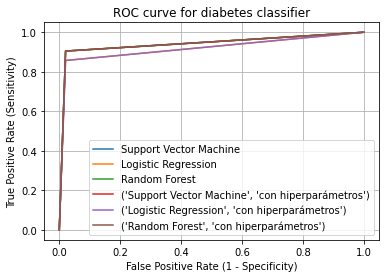

In [32]:
# Importar libreria
import matplotlib.pyplot as plt

# Generar gráfico
for i in range(0,3):
    plt.plot(comparacion[i][11], comparacion[i][12], label=names[i])

for i in range(0,3):
    plt.plot(comparacion2[i][11], comparacion2[i][12], label=(names[i],'con hiperparámetros'))
    
plt.title('ROC curve for diabetes classifier') 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.legend()
plt.grid(True)
plt.show()